# 图像识别解析

In [1]:
import sys

stdi, stdo, stde = sys.stdin, sys.stdout, sys.stderr
reload(sys)
sys.setdefaultencoding('utf-8')
sys.stdin, sys.stdout, sys.stderr = stdi, stdo, stde


import os
import re
import numpy as np
from skimage import draw
from aip import AipOcr 
# from skimage import io,color
# """ 你的 APPID AK SK """
APP_ID = '14865868'
API_KEY = 'nyGBk6GCXbFi0OtAl0w3may6'
SECRET_KEY = 'K2W60O8L3UR2P8i1gRjbf58Rd08ujIm5'
client = AipOcr(APP_ID, API_KEY, SECRET_KEY)

# """ 读取图片 """
def get_file_content(filePath):
    with open(filePath, 'rb') as fp:
        return fp.read()
# x = [os.path.join(file, filename) for filename in os.listdir(file)]
# for j in x:

In [2]:
def get_recongrel(file):
    rel = []
    tem = []
    pas_m = "扫描下方二维码".decode("utf8")
    image = get_file_content(file)
    res=client.general(image)
    if 'error_msg' in res.keys():
        print("file error".join(file))
    for i in res['words_result']:
        if re.match(pas_m, i['words']):
            print("".join([s for s in tem]))
        tem.append(i['words'])
    rel.append(tem)
    return "".join([s for s in tem])

In [3]:
# 0-   -- -- - - -效果太差 - - -- - - - -- - -
# file = '/Users/zhoudaoxian/Desktop/mingpian.jpeg'
# file = '/Users/zhoudaoxian/Desktop/handwrite.jpeg'
file = "/Users/zhoudaoxian/Desktop/13910139906.jpg"
print(get_recongrel(file)) 

捡光单)4年3月2)日取镜时间姓名憾圆住址邮编


## 带参数的 url gernal 

In [4]:
options = {}
options["language_type"] = "CHN_ENG"  # 识别语言类型：- CHN_ENG：中英文混合；...
options["detect_direction"] = "true"  # 是否检测图像朝向，默认不检测
options["detect_language"] = "true"   # 语言检测
options["probability"] = "true"       # 是否返回识别结果中每一行的置信度
""" 带参数调用通用文字识别, 图片参数为本地图片 """  
image = get_file_content("/Users/zhoudaoxian/Desktop/13910139906.jpg")
res = client.general(image, options)

dadwa


## 百度AI开发者平台 获取access_token示例代码

In [3]:
import urllib, urllib2, sys, json
import base64
import StringIO
import ssl
    # client_id 为官网获取的AK， client_secret 为官网获取的SK
def get_auth():
    apikey = "nyGBk6GCXbFi0OtAl0w3may6"
    secret_key = "K2W60O8L3UR2P8i1gRjbf58Rd08ujIm5"
    host = 'https://aip.baidubce.com/oauth/2.0/token?grant_type=client_credentials&client_id=%s&client_secret=%s' % (apikey, secret_key)
    request = urllib2.Request(host)
    request.add_header('Content-Type', 'application/json; charset=UTF-8')
    response = urllib2.urlopen(request)
    content = response.read()
    if (content):
        o = json.loads(content.decode())
        return o['access_token']
    return None

## 接口类型--------
|-------x

|
|
y

In [4]:
url = "https://aip.baidubce.com/rest/2.0/ocr/v1/general_basic"  # 通用
url = "https://aip.baidubce.com/rest/2.0/ocr/v1/accurate_basic" # 通用文字识别（高精度版）
url = "https://aip.baidubce.com/rest/2.0/ocr/v1/general"        # 通用文字识别（含位置信息版）
    #     recognize_granularity = big small                           # 是否定位单字符位置，big：不定位单字
    #     vertexes_location == 文字外接多边形顶点位置
url = "https://aip.baidubce.com/rest/2.0/ocr/v1/accurate"       # 通用文字识别（含位置高精度版）    
url = "https://aip.baidubce.com/rest/2.0/ocr/v1/handwriting"    # 手写文字识别
baseurl =  "https://aip.baidubce.com/rest/2.0/ocr/v1/"
urls = ["general_basic", "accurate_basic", "general", "accurate",  "handwriting"]
urls = [baseurl + i for i in urls]

In [7]:
# 测试图像
image = "/Users/zhoudaoxian/Desktop/13910139906.jpg"
image = get_file_content(image)

In [5]:
#---"body 请求参数   image ; language_type; detect_language;  detect_direction ;  probability ;  "---
def seturl_bodyH_get_post(url, image):
    access_token = get_auth()
    url = url +  "?access_token=%s" % access_token
    options = {}  
    options['vertexes_location'] = "true"       # 文字外接多边形顶点位置
    # options['recognize_granularity'] = 'small'
    options["language_type"] = "CHN_ENG"        # 识别语言类型：- CHN_ENG：中英文混合；...
    options["detect_direction"] = "true"        # 是否检测图像朝向，1:逆时针90度
    options["detect_language"] = "true"         # 语言检测
    options["probability"] = "true"             # 是否返回识别结果中每一行的置信度
    options['image'] = base64.b64encode(image)  # 对图片进行base64编码
    decode_data = urllib.urlencode(options)     # 将字符串进行URL编码
    
    req = urllib2.Request(url, data=decode_data)   # post请求
    req.add_header('Content-Type', 'application/x-www-form-urlencoded')
    req.add_header("API_KEY", API_KEY)
    res = urllib2.urlopen(req)
    content = res.read()
    if content is not None:
        rel = json.loads(content)
        print(rel.keys())
        return rel
    return None

In [6]:
import matplotlib.pyplot as plt
import cv2
import skimage.morphology as sm  # 膨胀与腐蚀
def show_fig(title, size,img):
    plt.figure(title, figsize=size)
    plt.imshow(img, plt.cm.gray)
    plt.title(title) # 图像题目
    plt.show()

In [7]:
import os
os.chdir("/Users/zhoudaoxian/Documents/frame/")
for i in os.listdir("/Users/zhoudaoxian/Documents/frame/")[1:10]:
    print(i.decode("utf-8"))

丁13671231678.jpg
丁13810084318.jpg
丁13811451870.jpg
丁13910497279.jpg
丁13911952408.jpg
丁15210609610.jpg
丁儿根13691285563.jpg
万13269799808.jpg
严13070188777.jpg


## 格式 
|--------------------------------------------------------> y axis
|
|{u'y': 225, u'x': 889}          {u'y': 1242, u'x': 889}   
|                       
|{u'y': 225, u'x': 955}          {u'y': 1242, u'x': 955}
|
v -(X axis)

{u'width': 68, u'top': 224, u'height': 1019, u'left': 889}

[{u'y': 1242, u'x': 889}, {u'y': 225, u'x': 889}, {u'y': 225, u'x': 955}, {u'y': 1242, u'x': 955}]

[u'log_id', u'direction', u'words_result_num', u'words_result']
1
{u'width': 111, u'top': 981, u'height': 907, u'left': 131}
[{u'y': 1887, u'x': 131}, {u'y': 983, u'x': 131}, {u'y': 983, u'x': 239}, {u'y': 1887, u'x': 239}]
{u'width': 62, u'top': 472, u'height': 262, u'left': 153}
[{u'y': 733, u'x': 153}, {u'y': 473, u'x': 153}, {u'y': 473, u'x': 212}, {u'y': 733, u'x': 212}]
{u'width': 72, u'top': 197, u'height': 1383, u'left': 1020}
[{u'y': 1580, u'x': 1020}, {u'y': 198, u'x': 1020}, {u'y': 198, u'x': 1089}, {u'y': 1580, u'x': 1089}]


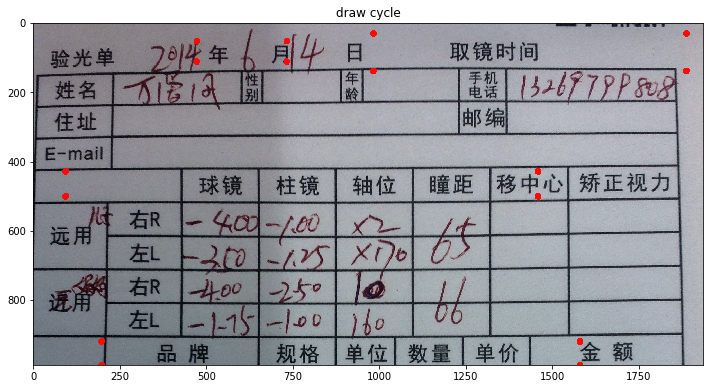

In [336]:
# 测试图像
from skimage import io,color
deb = 1 # 是否显示调试信息
image = "/Users/zhoudaoxian/Desktop/13910139906.jpg"
# image = "/Users/zhoudaoxian/Desktop/target.jpg"
image = "/Users/zhoudaoxian/Documents/frame/沈13810387085.jpg"
boxs = []
reac = []
for imgfile in os.listdir("/Users/zhoudaoxian/Documents/frame/")[8:10]:
    image = get_file_content(imgfile)
    img = cv2.imread(imgfile, 1) 
    url = urls[-2]  # 多个处理接口工具 选择一种，效果不一定相同
    rel = seturl_bodyH_get_post(url,image)
    print(rel[u'direction'])
    for k in rel[u'words_result']:
        words = k['words']
        if u'验光单' in words or u'光单' in words or u'单' in words: # 第一个定位点
            if deb:print(k[u'location']);print(k[u'vertexes_location'])
            boxs.extend([vv.values() for vv in k[u'vertexes_location']])  #  {u'y': 1242, u'x': 889} .....
            reac.append(np.array([vv.values() for vv in k[u'vertexes_location']]))
        if u'取镜时间' in words or u'取镜' in words or u'时间' in words:
            if deb:print(k[u'location']);print(k[u'vertexes_location'])
            boxs.extend([vv.values() for vv in k[u'vertexes_location']])
            reac.append(np.array([vv.values() for vv in k[u'vertexes_location']]))
        if u'球镜柱镜轴位瞳距移中心矫正视力' in words or u'矫正视力' in words or u'轴位' in words:
#             if deb:print(k[u'location']);print(k[u'vertexes_location'])
            boxs.extend([vv.values() for vv in k[u'vertexes_location']])
            reac.append(np.array([vv.values() for vv in k[u'vertexes_location']]))
        if u'规格单位数量单价' in words or u'规格单位' in words or u'单位数量' in words:
#             if deb:print(k[u'location']);print(k[u'vertexes_location'])
            boxs.extend([vv.values() for vv in k[u'vertexes_location']])
            reac.append(np.array([vv.values() for vv in k[u'vertexes_location']]))
        if u'金额' in k['words']:
            break
    # 切分
    y,x = [],[]
    for i in boxs:
        y.append(i[0])
        x.append(i[1])
    recta,rectb = np.min(x) - 30,np.max(x)   #  使用【vertexes_location】 X 进行Y切片定位
    img90=np.rot90(img, 3)
    target = img90[recta:rectb,:].copy()
    if deb:
        for rec in reac:
            for point in rec:
                rr, cc=draw.circle(point[1],point[0],10)    #  先画 X， 再画 Y
                draw.set_color(img90,[rr,cc],[255,9,0])        
#                 show_fig("draw cycle", (12,12), img[recta:rectb,:])
#                 input()
            cv2.drawContours(img90, [rec], 0, (0, 255, 0), 2) #  先画 Y， 再画 X --画a,
        rec = np.array([[20 ,recta], [20, rectb-30], [img90.shape[1]-10, rectb-30],[img90.shape[1]-10, recta]])
        cv2.drawContours(img90, [rec], 0, (230, 0, 230), 2)
        show_fig("draw cycle", (12,12), img90[recta:rectb,:])
    break
    cv2.imwrite("/Users/zhoudaoxian/Documents/frame_s/"+imgfile, target)

(1936, 2592, 3)
1


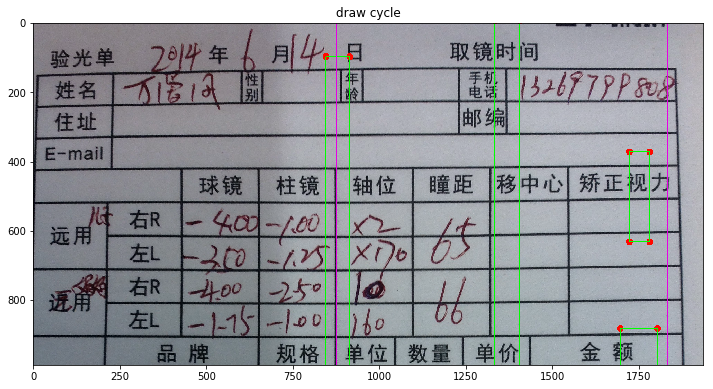

In [335]:
# 旋转图片到正确的角度位置
img90=np.rot90(img, 3)
print(img.shape)
print(rel[u'direction'])
show_fig("draw cycle", (12,12), img90[recta:rectb,:])

### 测试上面剪裁的图像

/Users/zhoudaoxian/Documents/frame_s/丁13810084318.jpg
[u'log_id', u'words_result_num', u'words_result']
HYJ北京黄益静眼镜行票
产品名称:定配眼镜N00014321古学
验光单20(4年4月22日
取镜时间
姓名
年龄
电话ByoA431A
手机
住址
邮编
E-mail
球镜柱镜轴位瞳距移中心矫正视力
远用右1
使-15-07+70
左L
CD-10D10
)
左亡
07
口口
牌
规格单位数量单价金额


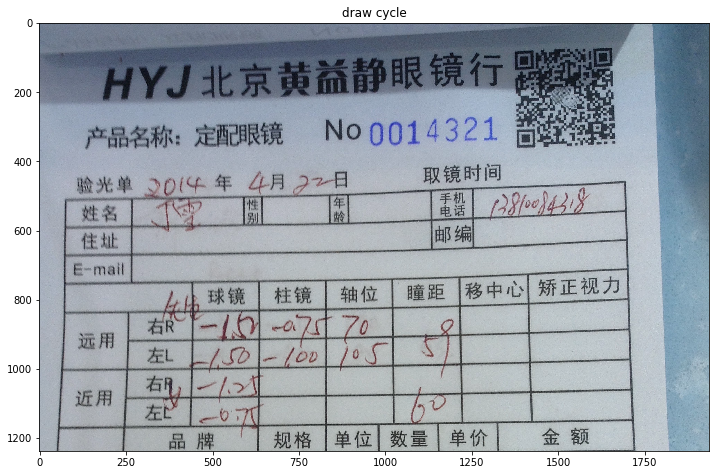

In [12]:
deb = 0 # 是否显示调试信息
boxs = []
if 1:
    te_img = "/Users/zhoudaoxian/Documents/frame_s/丁13810084318.jpg"
# for te_img in os.listdir("/Users/zhoudaoxian/Documents/frame_s/")[1:]:
    image = get_file_content(te_img)
    img = cv2.imread(te_img, 1) 
    url = urls[-1]  # 次次采用手写识别接口
    print(te_img)
    rel = seturl_bodyH_get_post(url,image)
    for k in rel[u'words_result']:
        words = k['words']
        print(words)
#         reac.append(np.array([vv.values() for vv in k[u'vertexes_location']]))
        if deb:print(k[u'location']);# print(k[u'vertexes_location'])
    show_fig("draw cycle", (12,12), img)
    if deb:
        for rec in reac:
            for point in rec:
                rr, cc=draw.circle(point[1],point[0],10)    #  先画 X， 再画 Y
                draw.set_color(img,[rr,cc],[255,9,0])        
            cv2.drawContours(img, [rec], 0, (0, 255, 0), 2) #  先画 Y， 再画 X --画a,
        show_fig("draw cycle", (12,12), img)


In [342]:
rel

{u'error_code': 216201,
 u'error_msg': u'image format error',
 u'log_id': 1808018427996398812}

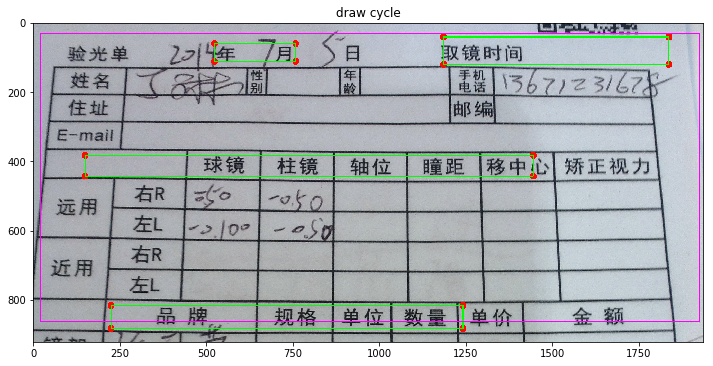

In [312]:
img = cv2.imread(imgfile, 1) 
for rec in reac:
    for point in rec:
        rr, cc=draw.circle(point[1],point[0],10)    #  先画 X， 再画 Y
        draw.set_color(img,[rr,cc],[255,9,0])        
    cv2.drawContours(img, [rec], 0, (0, 255, 0), 2) #  先画 Y， 再画 X --画a,
rec = np.array([[20 ,recta], [20, rectb-30], [img.shape[1]-10, rectb-30],[img.shape[1]-10, recta]])
cv2.drawContours(img, [rec], 0, (255, 0, 255), 2)
show_fig("draw cycle", (12,12), img[recta-30:rectb+30,:])

# h高   w宽  
2592，1936 --> 切片:::

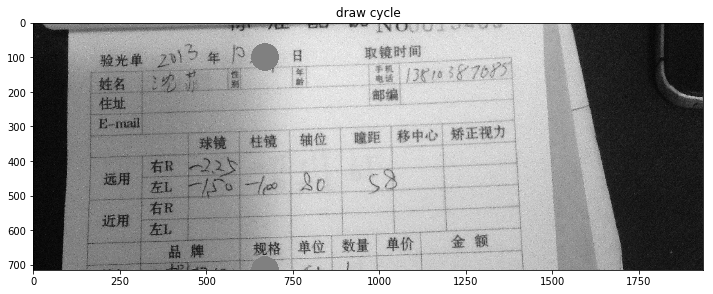

True

In [139]:
# 比例换算得到真实坐标
# 1，先查各种角度，使用skimg.io # True 以灰度图方式打开 默认打开是-90°
img = cv2.imread("/Users/zhoudaoxian/Documents/frame/沈13810387085.jpg", 1)    # 2dim nd.array (2592，1936) shape
target = img[h1-100:h3,:].copy()
rr, cc=draw.circle(h1,w1,40)  #      定位： HiGht:+top               width. + left/2 中间
draw.set_color(img,[rr,cc], 128) # [255,0,45]
# draw.set_color(img,[rr,cc],[0,9,234])
rr, cc=draw.circle(h3,w3,40)  #    第二个定位点 规格单价数量单价金额
draw.set_color(img,[rr,cc], 128) # [255,0,45]

show_fig("draw cycle", (12,12), img[h1-100:h3,:])
cv2.imwrite("/Users/zhoudaoxian/Desktop/target.jpg", target)

### location 解释域定义

In [126]:
print(rel[u'direction'])
year = ''
mouth = ''
day = ''
name = ''
for k in rel[u'words_result']:
    if u'验光单' in k['words'] or u'光单' in k['words']:
        year = k['words'] 
    if u'年' in k['words']:
        mouth = k['words'] 
    if u'月' in k['words']:
        day = k['words'] 
    if u'姓名' in k['words'] or u'名' in k['words']:
        name = k['words'] 
    if u'手机' in k['words'] or u'号码' in k['words']:
        tell = k['words']
    if u'金额' in k['words']:
        break
# img90=np.rot90(img)
# mark = cv2.drawContours(img, box, 0, (0, 255, 0), 2)
# rr, cc=draw.circle(1224,97, 50)
# draw.set_color(img90,[rr,cc],[0])
# show_fig("draw mark", (20,20), mark)

 ## 自定义模板的识别  模板无法设定，太复杂了，放弃该方案
 https://aip.baidubce.com/rest/2.0/solution/v1/iocr/recognise

In [ ]:
# image
# templateSign # 文字识别平台制作的模板的ID，举例：Nsdax2424asaAS791823112
# classifierId # 分类器Id。这个参数和templateSign至少存在一个，优先使用templateSign


### 表格文字识别(异步接口)
自动识别表格线及表格内容，结构化输出表头、表尾及每个单元格的文字内容。 本接口为异步接口，分为两个API：提交请求接口、获取结果接口。
返回说明：
   1、 log_id	是	long	唯一的log id，用于问题定位 \n
    
   2、 result	是	list	返回的结果列表 \n
    
   3、 +request_id	是	string	该请求生成的request_id，后续使用该request_id获取识别结果

    4、   失败返回示例 errorcode

####  请求结果接口
"https://aip.baidubce.com/rest/2.0/solution/v1/form_ocr/request"


In [177]:
import json
def get_post_table(url, image, req_or_get = False):
    access_token = get_auth()
    url = url +  "?access_token=%s" % access_token
    options = {}
    if req_or_get:
        options['request_id'] = request_id
        options['result_type'] = "json"  # excel as default
    else:
        options['image'] = base64.b64encode(image)  # 对图片进行base64编码
    decode_data = urllib.urlencode(options)     # 将字符串进行URL编码
    
    req = urllib2.Request(url, data=decode_data)   # post请求
    req.add_header('Content-Type', 'application/x-www-form-urlencoded')
    req.add_header("API_KEY", API_KEY)
    res = urllib2.urlopen(req)
    content = res.read()
    if content is not None:
        rel = json.loads(content)
#         print(rel.keys())
        return rel
    return None

In [168]:
url_req_table = "https://aip.baidubce.com/rest/2.0/solution/v1/form_ocr/request"
req_table = get_post_table(url_req_table, image, False)
log_id = req_table['log_id']
request_id = req_table['result'][0]['request_id']

####  获取结果接口
request_id	是	string	-	发送表格文字识别请求时返回的request id
result_type	否	string	-	期望获取结果的类型，取值为“excel”时返回xls文件的地址，取值为“json”时返回json格式的字符串,默认为”excel”

In [194]:
# get rel post
url_get_table = "https://aip.baidubce.com/rest/2.0/solution/v1/form_ocr/get_request_result"
req_table = get_post_table(url_get_table, ' ', True)
req_table['result']['percent']
table = json.loads(req_table['result'][u'result_data'])
for i in table[u'forms'][0]['body']:
    print(i['word'])

名址



药一女

手电机话
邮编
139/0/39



In [14]:
l1 = [ "\x01".join(["zc","xf","a","b"])  ,       "\x01".join(["d","e","a","b"])  ,       "\x01".join(["f","h","a","b"]) ]


In [15]:
l1

['zc\x01xf\x01a\x01b', 'd\x01e\x01a\x01b', 'f\x01h\x01a\x01b']

In [16]:
"\n".join(l1)

'zc\x01xf\x01a\x01b\nd\x01e\x01a\x01b\nf\x01h\x01a\x01b'